# Classification
- Target Var -> Response

## Problem Statement 
- Using classification models predict response of the customer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ifood_df.csv')

In [3]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


### Descriptive Stats

In [4]:
df.shape

(2205, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [6]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,51.095692,2512.718367,0.104308,0.387302,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815,11.705801,202.563647,0.305730,0.487244,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,24.000000,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,43.000000,2339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,50.000000,2515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,61.000000,2688.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000,80.000000,2858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [7]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [8]:
for i in df.columns:
    print(i, df[i].nunique(), '\n')

Income 1963 

Kidhome 3 

Teenhome 3 

Recency 100 

MntWines 775 

MntFruits 158 

MntMeatProducts 551 

MntFishProducts 182 

MntSweetProducts 176 

MntGoldProds 212 

NumDealsPurchases 15 

NumWebPurchases 15 

NumCatalogPurchases 13 

NumStorePurchases 14 

NumWebVisitsMonth 16 

AcceptedCmp3 2 

AcceptedCmp4 2 

AcceptedCmp5 2 

AcceptedCmp1 2 

AcceptedCmp2 2 

Complain 2 

Z_CostContact 1 

Z_Revenue 1 

Response 2 

Age 56 

Customer_Days 662 

marital_Divorced 2 

marital_Married 2 

marital_Single 2 

marital_Together 2 

marital_Widow 2 

education_2n Cycle 2 

education_Basic 2 

education_Graduation 2 

education_Master 2 

education_PhD 2 

MntTotal 897 

MntRegularProds 974 

AcceptedCmpOverall 5 



In [9]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [10]:
for i in df.columns:
    print(i, df[i].unique(), '\n')

Income [58138. 46344. 71613. ... 56981. 69245. 52869.] 

Kidhome [0 1 2] 

Teenhome [0 1 2] 

Recency [58 38 26 94 16 34 32 19 68 59 82 53 23 51 20 91 86 41 42 63  0 69 89  4
 96 56 31  8 55 37 76 99  3 88 72 24 92 39 29  2 54 57 30 12 18 75 90  1
 40  9 87  5 95 48 70 79 84 44 43 35 15 17 46 27 25 74 85 65 13 83 10 21
 61 73 47 36 49 28 64 78 77 81 80 45 14 52 98 93 50 60 11 66 97 62  6 33
 22 71 67  7] 

MntWines [ 635   11  426  173  520  235   76   14   28    6  194  233    3 1006
   53   84 1012    4   86    1  867  384  270   36  684    8  112  110
   96  482   40  702   55  437  421   13    9  123  826  245  650   12
  510  328  984  295  447  712  452  523  546  398   10  688  247  856
  496  258  565    2  721 1032  577   64   25  163   17  130  292  350
  135   15   27    5  505   51  207   41  386  562  217  144  454  425
 1332  527  490  378  547   47  320   34  722  162  450   70  492  120
  534  236  220  796    0  962  738  399  614   32  598   73   42  346
  888  997  2

In [11]:
df['AcceptedCmp1'].value_counts()

0    2063
1     142
Name: AcceptedCmp1, dtype: int64

In [12]:
df['AcceptedCmp2'].value_counts()

0    2175
1      30
Name: AcceptedCmp2, dtype: int64

In [13]:
df['AcceptedCmp3'].value_counts()

0    2042
1     163
Name: AcceptedCmp3, dtype: int64

In [14]:
df['AcceptedCmp4'].value_counts()

0    2041
1     164
Name: AcceptedCmp4, dtype: int64

In [15]:
df['AcceptedCmp5'].value_counts()

0    2044
1     161
Name: AcceptedCmp5, dtype: int64

In [16]:
df['AcceptedCmpOverall'].value_counts()

0    1747
1     322
2      81
3      44
4      11
Name: AcceptedCmpOverall, dtype: int64

In [17]:
dfn = df.drop(['Z_CostContact','Z_Revenue'], axis=1)

In [18]:
# Null values

dfn.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpOverall      0
dtype: int64

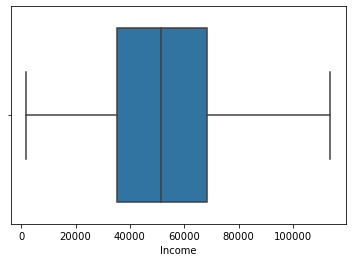

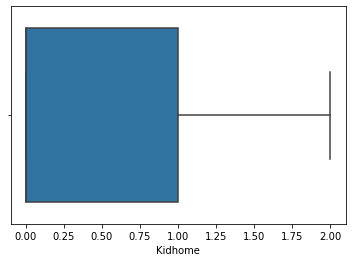

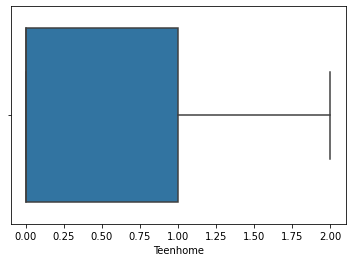

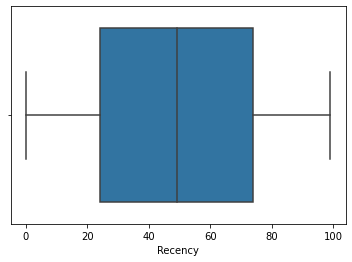

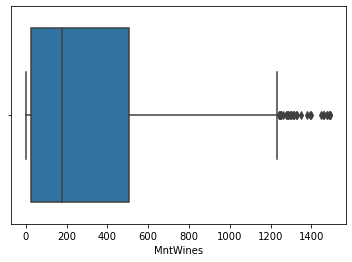

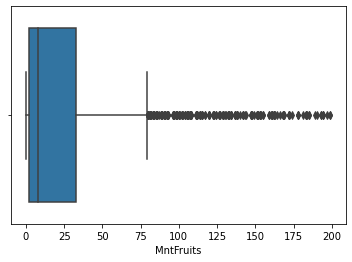

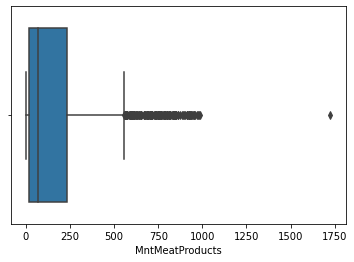

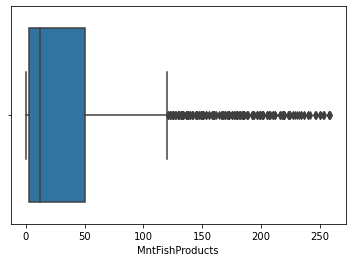

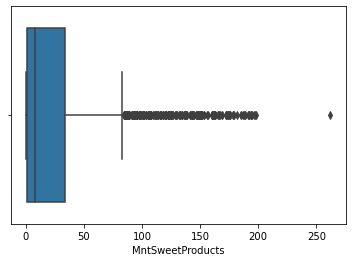

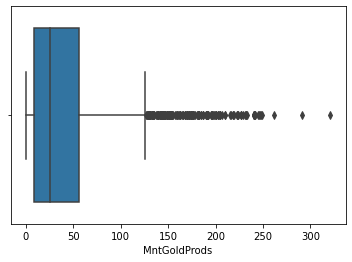

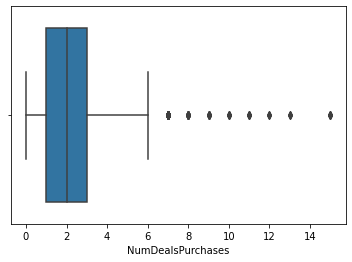

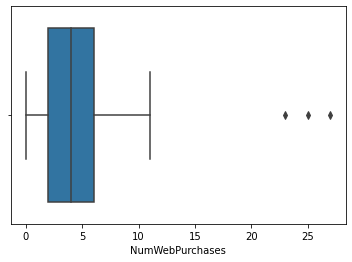

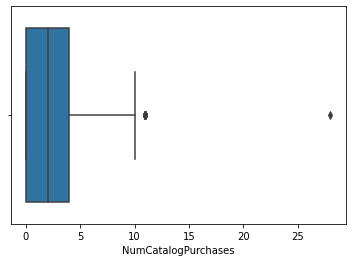

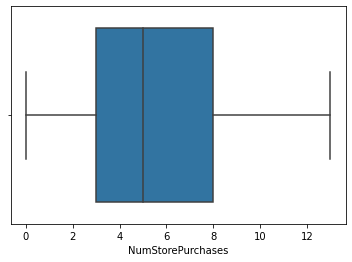

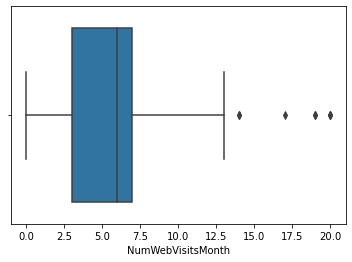

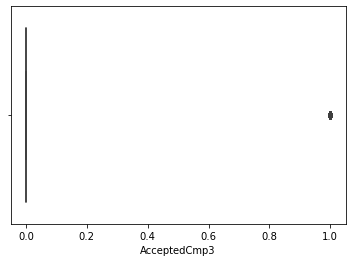

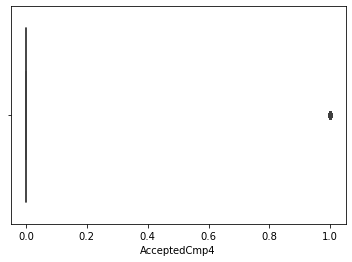

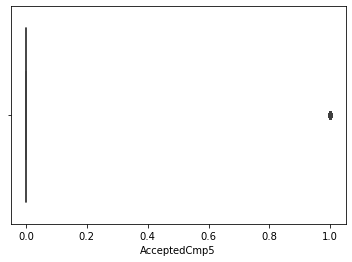

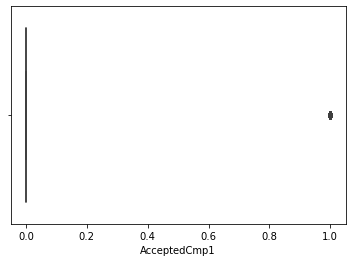

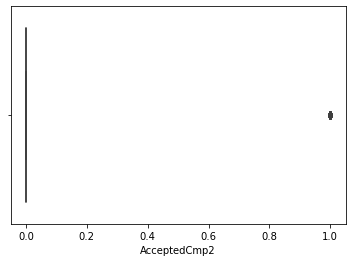

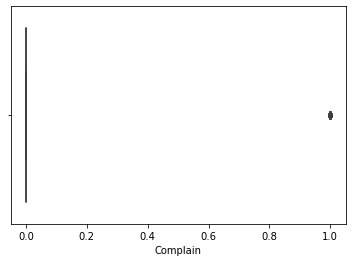

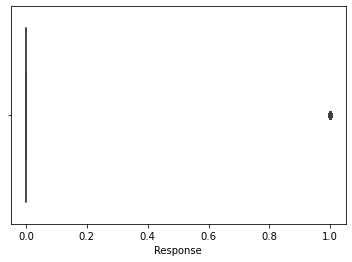

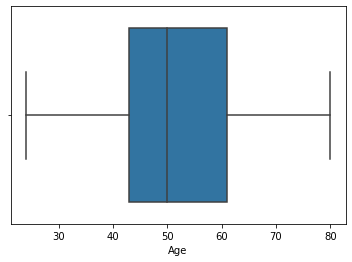

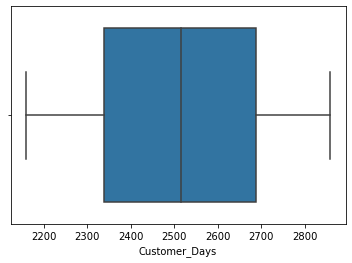

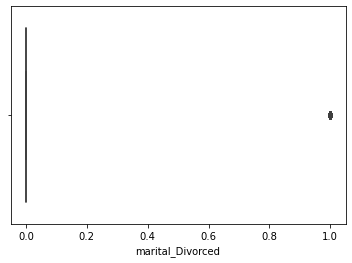

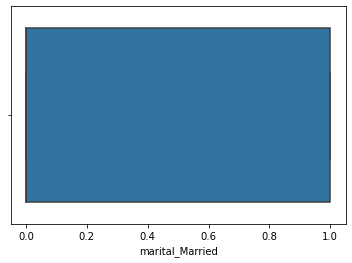

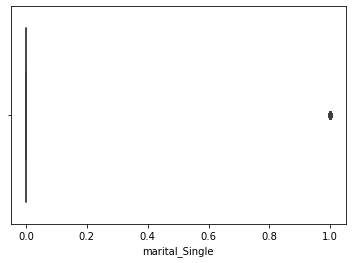

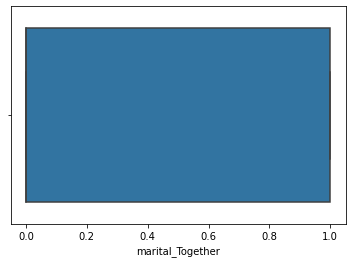

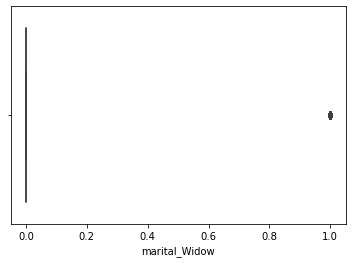

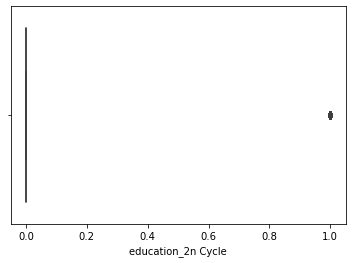

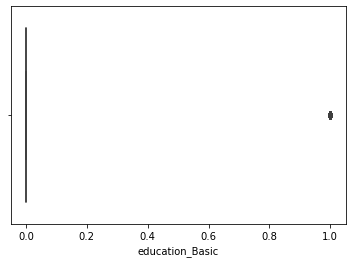

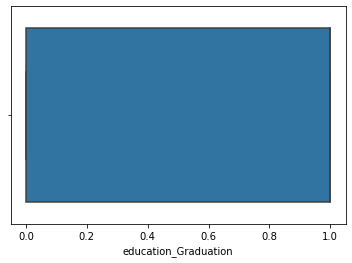

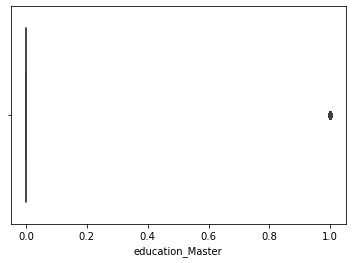

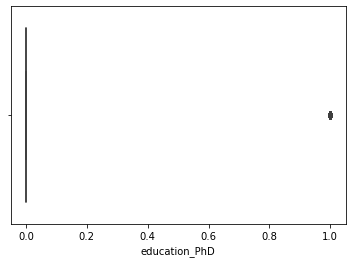

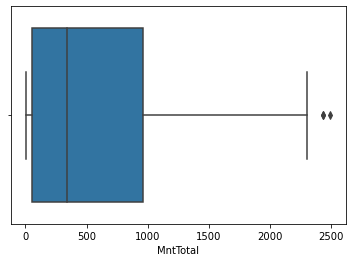

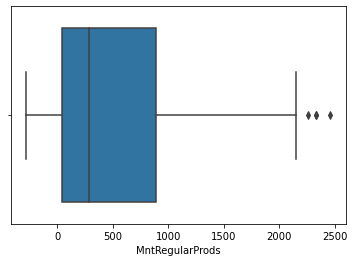

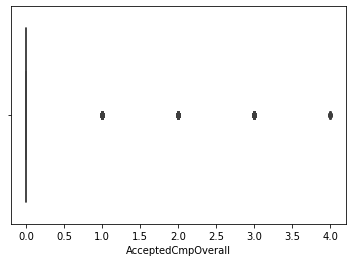

In [19]:
for i in dfn.columns:
    sns.boxplot(dfn[i])
    plt.show()

In [20]:
dfn.shape

(2205, 37)

## viz

<AxesSubplot:>

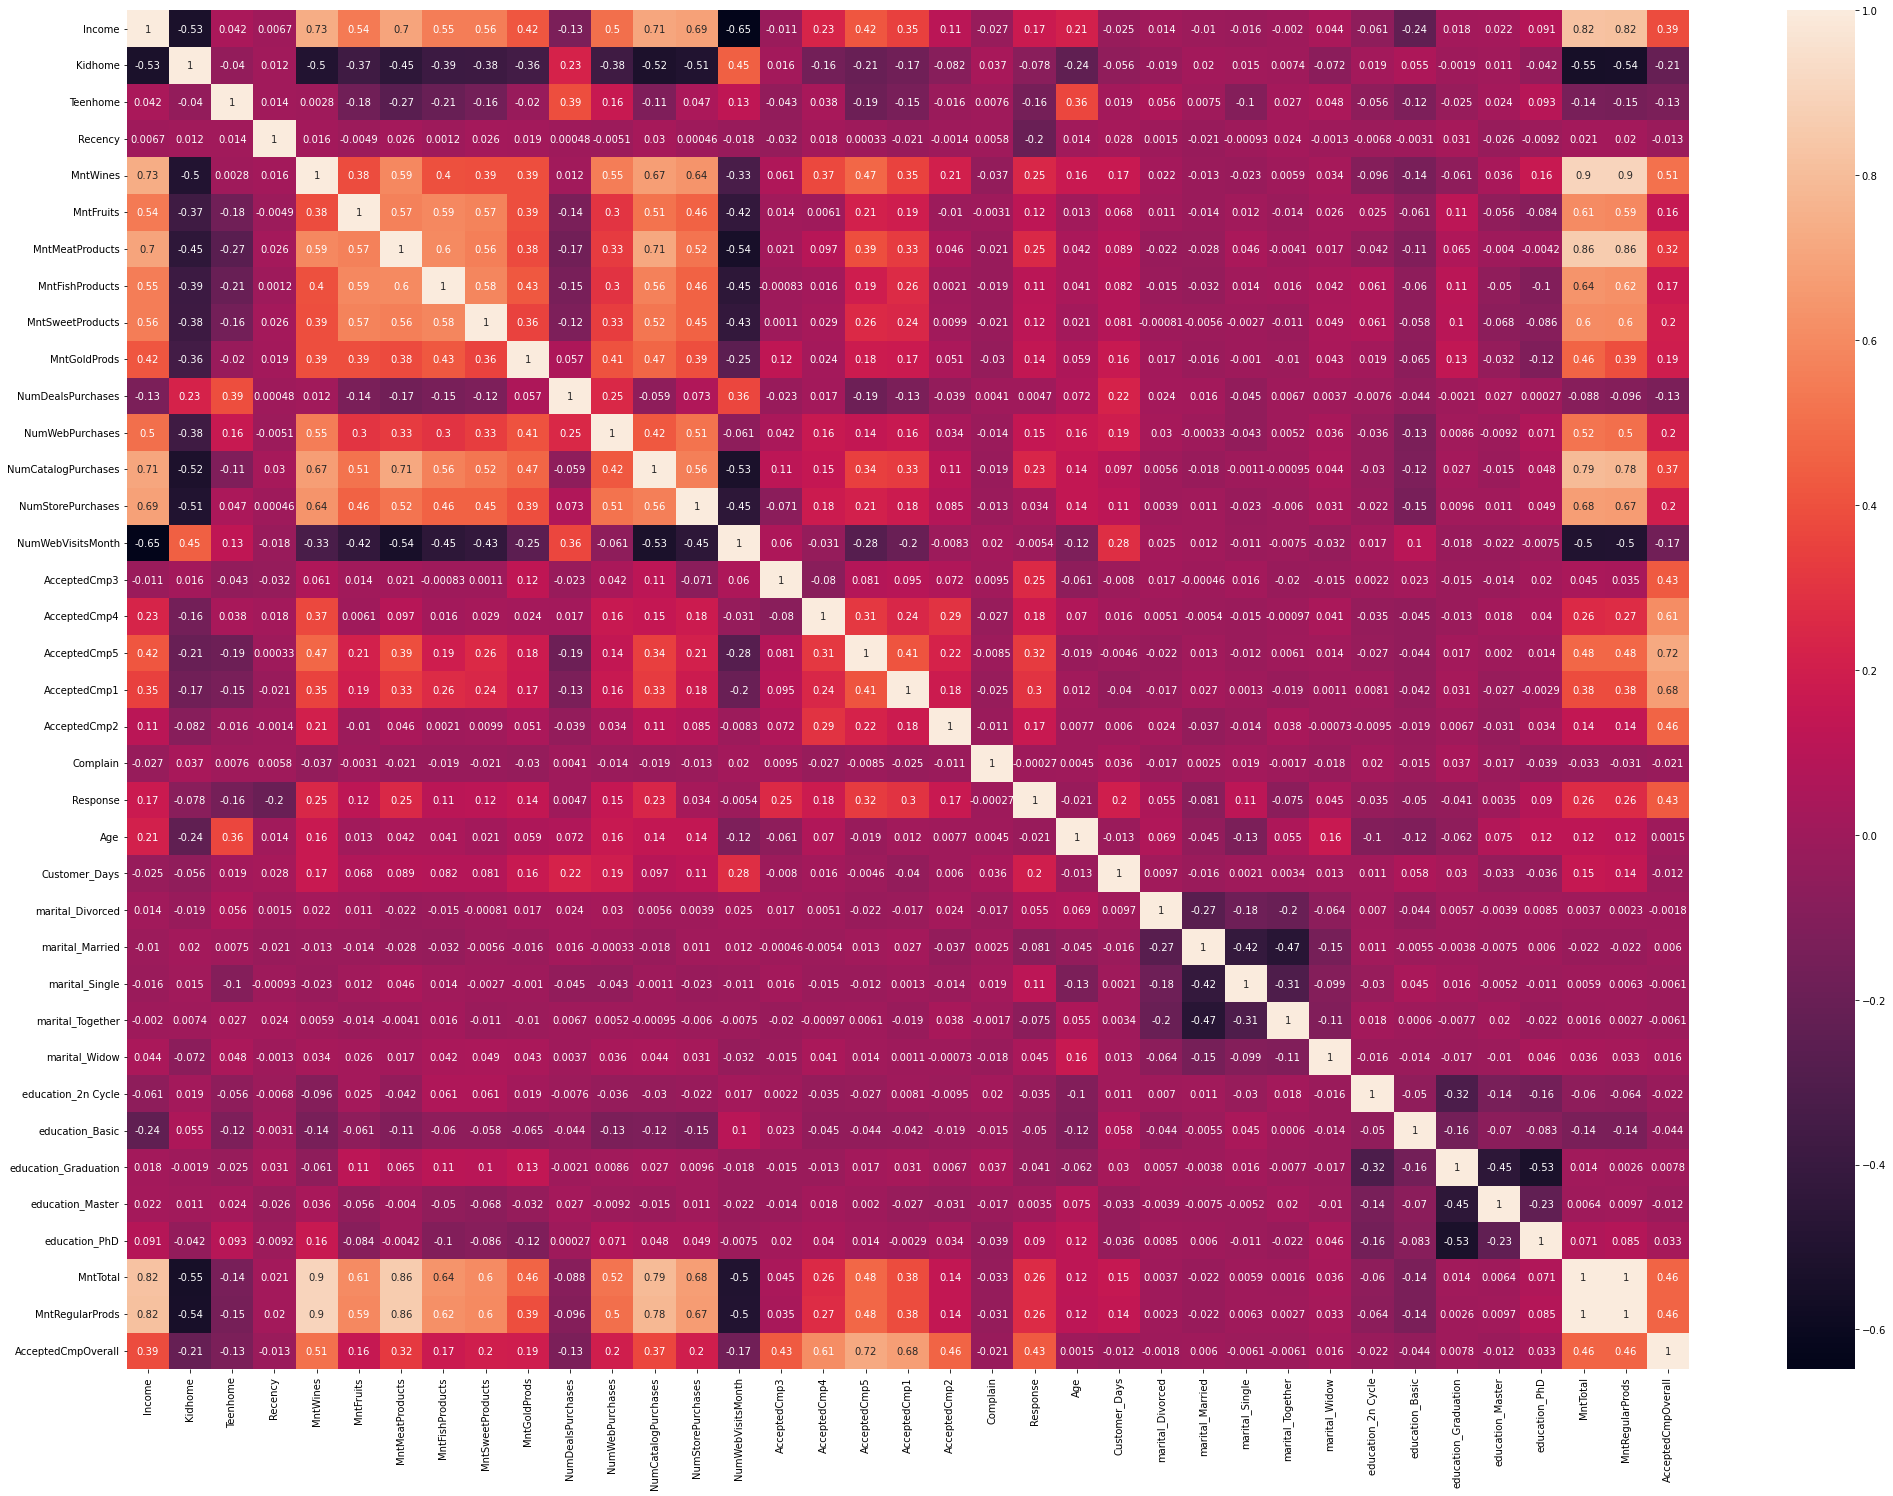

In [21]:
plt.figure(figsize=(35,25))
sns.heatmap(dfn.corr(), annot=True)

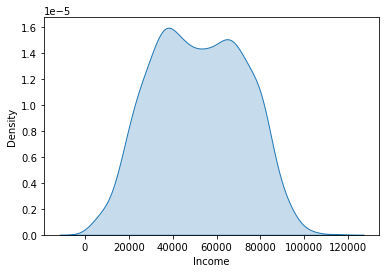

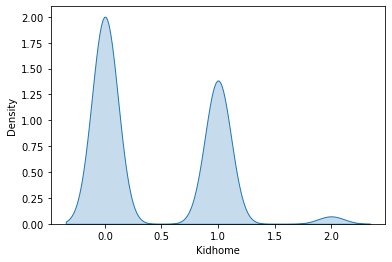

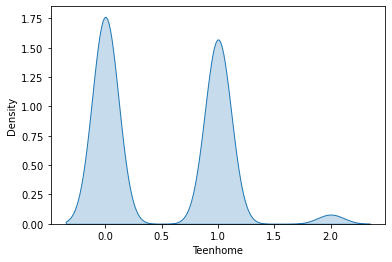

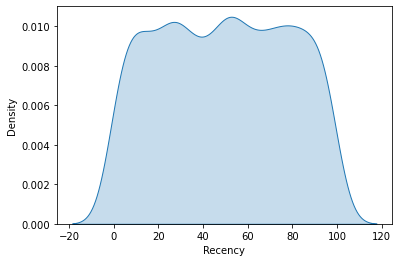

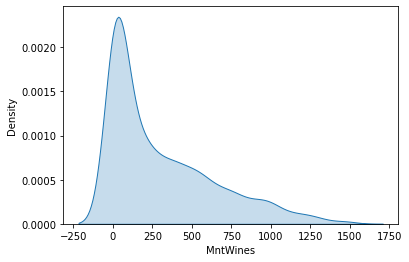

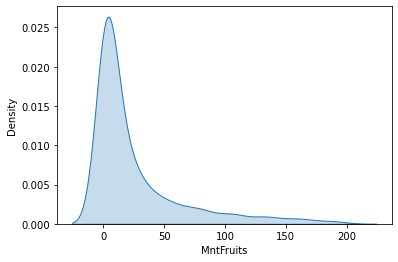

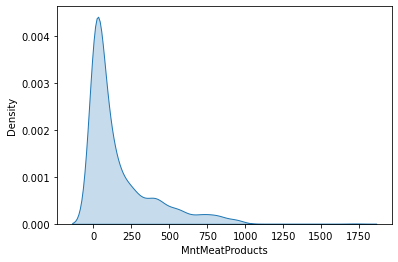

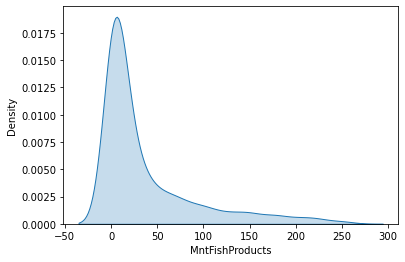

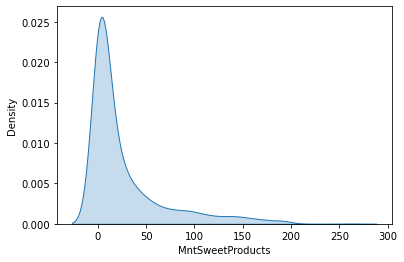

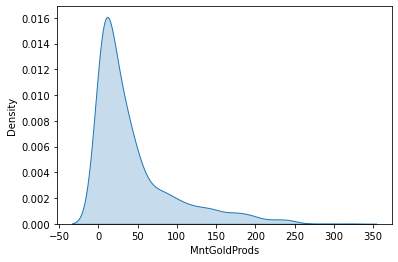

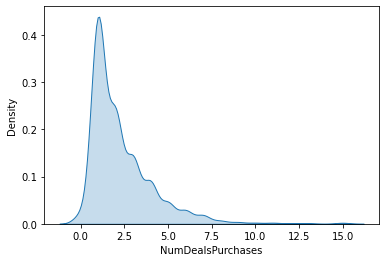

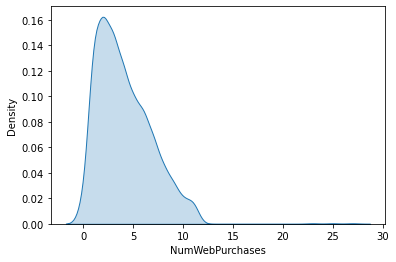

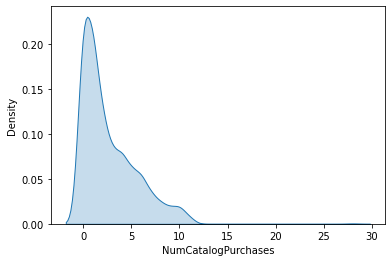

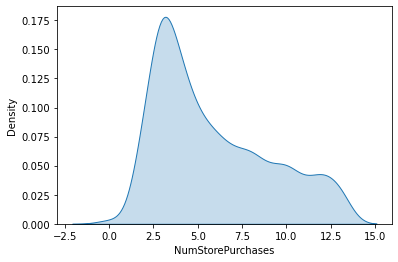

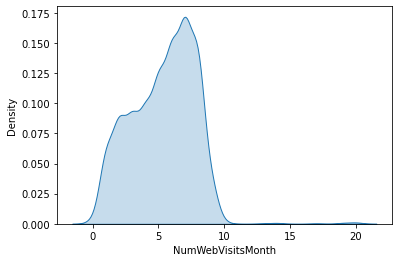

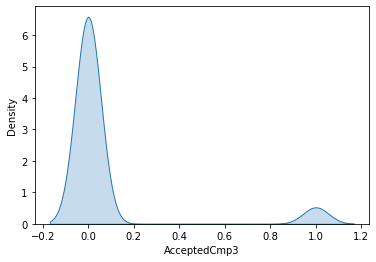

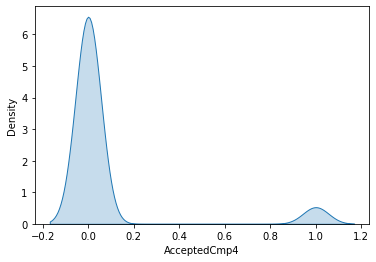

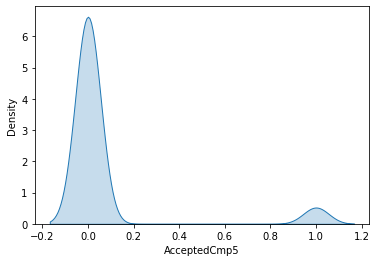

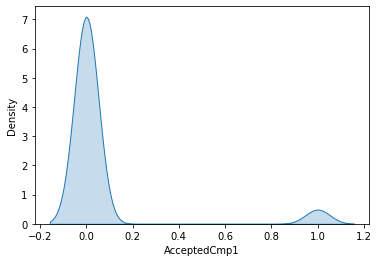

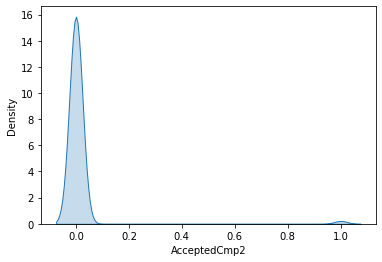

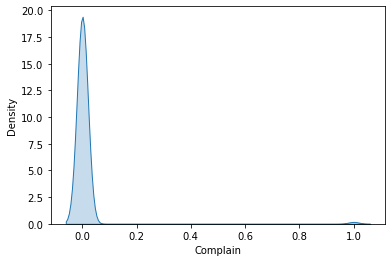

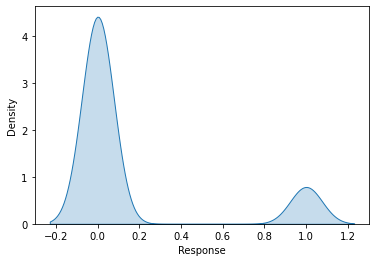

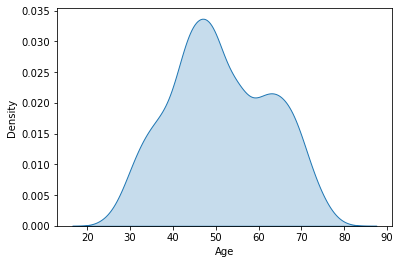

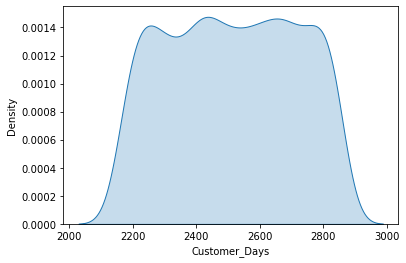

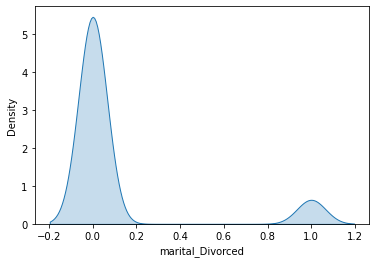

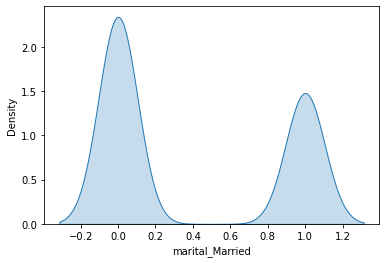

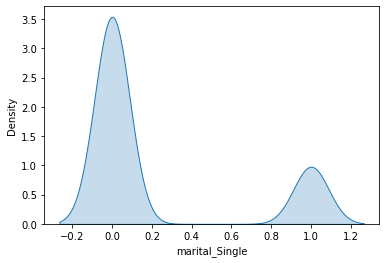

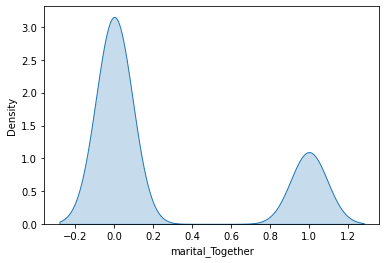

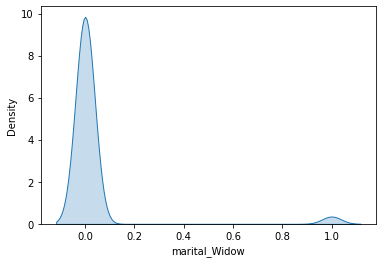

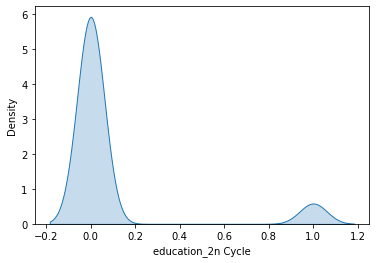

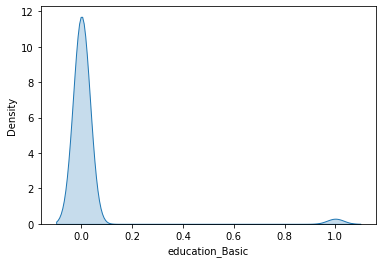

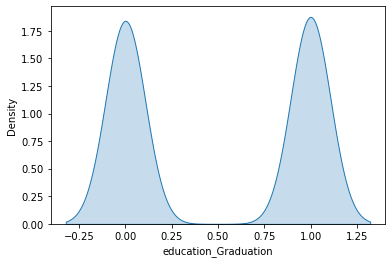

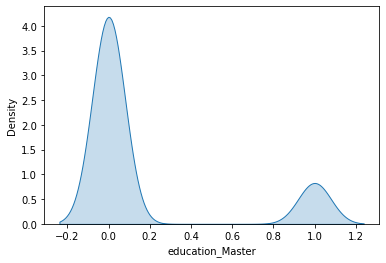

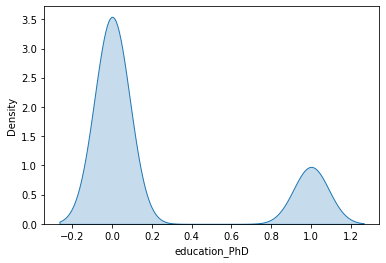

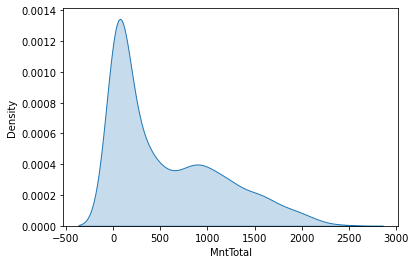

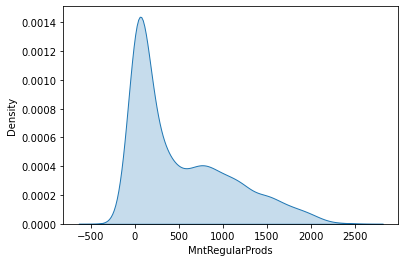

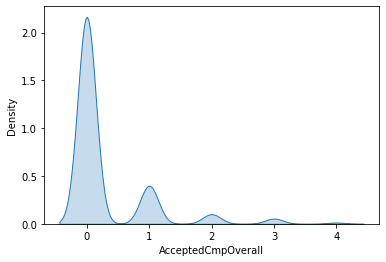

In [22]:
for i in dfn.columns:
    sns.kdeplot(dfn[i], shade=True)
    plt.show()

In [39]:
dfn['Response'].value_counts()/len(dfn)*100

0    84.897959
1    15.102041
Name: Response, dtype: float64

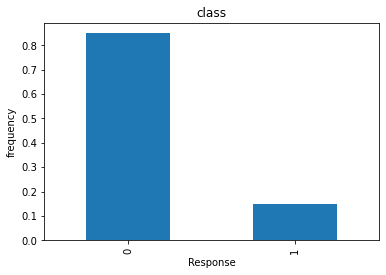

In [41]:
dfn["Response"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Response",
    ylabel="frequency",
    title="class"
);

#### Univariate Analysis

<AxesSubplot:xlabel='Income', ylabel='Density'>

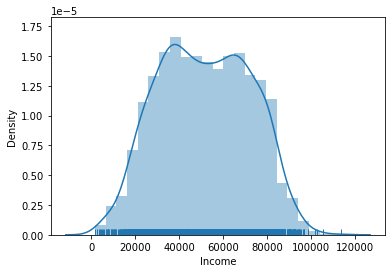

In [48]:
sns.distplot(df['Income'], rug=True)

In [46]:
df['Income'].describeribe()

count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64

In [47]:
df['Income'].mean()

51622.0947845805

<AxesSubplot:xlabel='Age', ylabel='Density'>

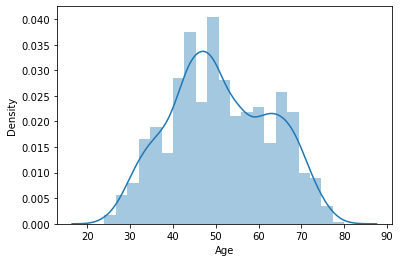

In [61]:
sns.distplot(df['Age'])

In [62]:
df['Age'].describe()

count    2205.000000
mean       51.095692
std        11.705801
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max        80.000000
Name: Age, dtype: float64

In [63]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [68]:
pd.crosstab(df['Kidhome'], df['Response'])

Response,0,1
Kidhome,,
0,1055,221
1,773,110
2,44,2


<AxesSubplot:xlabel='Kidhome'>

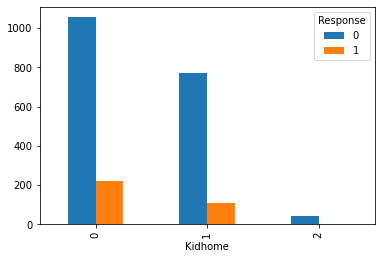

In [66]:
pd.crosstab(df['Kidhome'], df['Response']).plot(kind='bar')

<AxesSubplot:xlabel='Teenhome'>

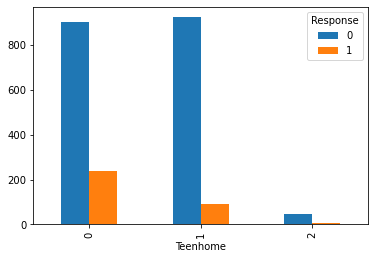

In [67]:
pd.crosstab(df['Teenhome'], df['Response']).plot(kind='bar')

<AxesSubplot:xlabel='MntGoldProds'>

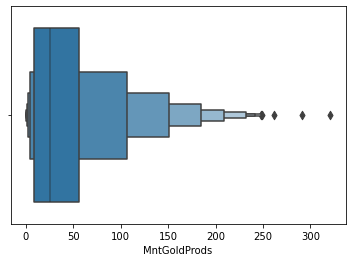

In [69]:
sns.boxenplot(df['MntGoldProds'])

<AxesSubplot:xlabel='MntGoldProds', ylabel='Density'>

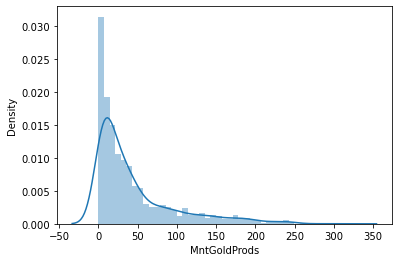

In [70]:
sns.distplot(df['MntGoldProds'])

### Bivariate Analysis

In [49]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,51.095692,2512.718367,0.104308,0.387302,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815,11.705801,202.563647,0.305730,0.487244,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,24.000000,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,43.000000,2339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,50.000000,2515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,61.000000,2688.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000,80.000000,2858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


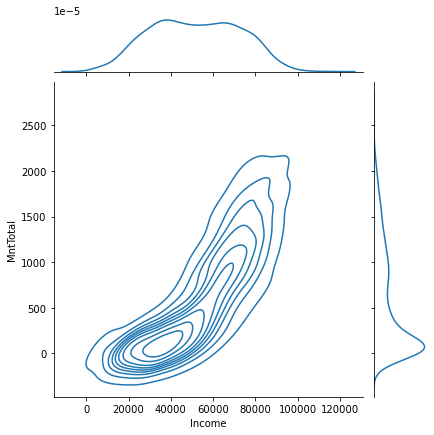

In [58]:
sns.jointplot(df['Income'], df['MntTotal'], data=df, kind='kde')

<AxesSubplot:xlabel='Response', ylabel='Income'>

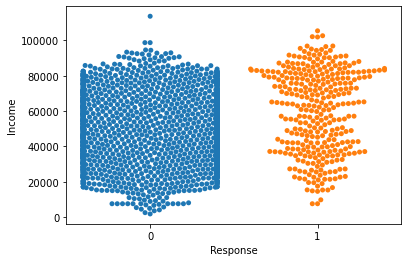

In [59]:
sns.swarmplot(df['Response'], df['Income'], data=df)

<AxesSubplot:xlabel='Response', ylabel='Age'>

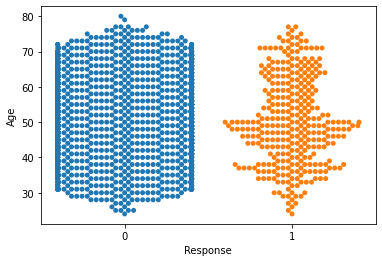

In [60]:
sns.swarmplot(df['Response'], df['Age'], data=df)

<AxesSubplot:xlabel='Response', ylabel='Income'>

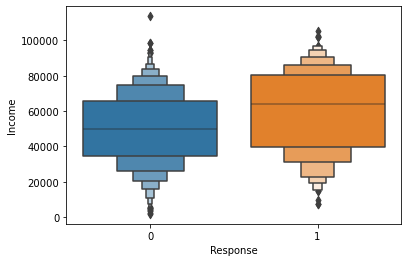

In [71]:
sns.boxenplot(df['Response'], df['Income'], data=df)

## Model Building

In [24]:
X = dfn.drop('Response',axis=1)
y = dfn['Response']

In [25]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=12)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
LR = LogisticRegression()
LR.fit(Xtrain, ytrain)
ypred = LR.predict(Xtest)

In [28]:
from sklearn.metrics import classification_report, f1_score

In [29]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       378
           1       0.53      0.14      0.22        63

    accuracy                           0.86       441
   macro avg       0.70      0.56      0.57       441
weighted avg       0.82      0.86      0.82       441



In [30]:
f1_score(ytest, ypred)

0.22499999999999998

In [31]:
from imblearn.combine import SMOTETomek

from collections import Counter

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, cohen_kappa_score, f1_score

pnt = [0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
for i in pnt:
    print('SMOTE = ', i)
    os=SMOTETomek(i)
    X_train_ns,y_train_ns=os.fit_resample(Xtrain,ytrain)
    print("The number of classes before fit {}".format(Counter(ytrain)))
    print("The number of classes after fit {}".format(Counter(y_train_ns)))

    classifier=KNeighborsClassifier()
    classifier.fit(X_train_ns,y_train_ns)
    y_pred=classifier.predict(Xtest)
    print('confusion_matrix','\n',confusion_matrix(ytest,y_pred))
    print('accuracy_score: ', accuracy_score(ytest,y_pred))
    print('Classification_report: ','\n', classification_report(ytest,y_pred))
    print('Kappa score: ',cohen_kappa_score(ytest,y_pred))
    print('f1 score: ',f1_score(ytest,y_pred))
    print('\n')

SMOTE =  0.6
The number of classes before fit Counter({0: 1494, 1: 270})
The number of classes after fit Counter({0: 1427, 1: 829})
confusion_matrix 
 [[308  70]
 [ 34  29]]
accuracy_score:  0.764172335600907
Classification_report:  
               precision    recall  f1-score   support

           0       0.90      0.81      0.86       378
           1       0.29      0.46      0.36        63

    accuracy                           0.76       441
   macro avg       0.60      0.64      0.61       441
weighted avg       0.81      0.76      0.78       441

Kappa score:  0.22222222222222232
f1 score:  0.3580246913580246


SMOTE =  0.65
The number of classes before fit Counter({0: 1494, 1: 270})
The number of classes after fit Counter({0: 1422, 1: 899})
confusion_matrix 
 [[298  80]
 [ 29  34]]
accuracy_score:  0.7528344671201814
Classification_report:  
               precision    recall  f1-score   support

           0       0.91      0.79      0.85       378
           1       0.30   

In [32]:
from imblearn.combine import SMOTETomek

from collections import Counter

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, cohen_kappa_score, f1_score

pnt = [0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
for i in pnt:
    print('SMOTE = ', i)
    os=SMOTETomek(i)
    X_train_ns,y_train_ns=os.fit_resample(Xtrain,ytrain)
    print("The number of classes before fit {}".format(Counter(ytrain)))
    print("The number of classes after fit {}".format(Counter(y_train_ns)))

    classifier=DecisionTreeClassifier()
    classifier.fit(X_train_ns,y_train_ns)
    y_pred=classifier.predict(Xtest)
    print('confusion_matrix','\n',confusion_matrix(ytest,y_pred))
    print('accuracy_score: ', accuracy_score(ytest,y_pred))
    print('Classification_report: ','\n', classification_report(ytest,y_pred))
    print('Kappa score: ',cohen_kappa_score(ytest,y_pred))
    print('f1 score: ',f1_score(ytest,y_pred))
    print('\n')

SMOTE =  0.6
The number of classes before fit Counter({0: 1494, 1: 270})
The number of classes after fit Counter({0: 1426, 1: 828})
confusion_matrix 
 [[337  41]
 [ 26  37]]
accuracy_score:  0.8480725623582767
Classification_report:  
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       378
           1       0.47      0.59      0.52        63

    accuracy                           0.85       441
   macro avg       0.70      0.74      0.72       441
weighted avg       0.86      0.85      0.85       441

Kappa score:  0.43561973525872444
f1 score:  0.524822695035461


SMOTE =  0.65
The number of classes before fit Counter({0: 1494, 1: 270})
The number of classes after fit Counter({0: 1413, 1: 890})
confusion_matrix 
 [[329  49]
 [ 21  42]]
accuracy_score:  0.8412698412698413
Classification_report:  
               precision    recall  f1-score   support

           0       0.94      0.87      0.90       378
           1       0.46   

In [33]:
from imblearn.combine import SMOTETomek

from collections import Counter

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, cohen_kappa_score, f1_score

pnt = [0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
for i in pnt:
    print('SMOTE = ', i)
    os=SMOTETomek(i)
    X_train_ns,y_train_ns=os.fit_resample(Xtrain,ytrain)
    print("The number of classes before fit {}".format(Counter(ytrain)))
    print("The number of classes after fit {}".format(Counter(y_train_ns)))

    classifier=RandomForestClassifier()
    classifier.fit(X_train_ns,y_train_ns)
    y_pred=classifier.predict(Xtest)
    print('confusion_matrix','\n',confusion_matrix(ytest,y_pred))
    print('accuracy_score: ', accuracy_score(ytest,y_pred))
    print('Classification_report: ','\n', classification_report(ytest,y_pred))
    print('Kappa score: ',cohen_kappa_score(ytest,y_pred))
    print('f1 score: ',f1_score(ytest,y_pred))
    print('\n')

SMOTE =  0.6
The number of classes before fit Counter({0: 1494, 1: 270})
The number of classes after fit Counter({0: 1417, 1: 819})
confusion_matrix 
 [[358  20]
 [ 26  37]]
accuracy_score:  0.8956916099773242
Classification_report:  
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       378
           1       0.65      0.59      0.62        63

    accuracy                           0.90       441
   macro avg       0.79      0.77      0.78       441
weighted avg       0.89      0.90      0.89       441

Kappa score:  0.5564738292011019
f1 score:  0.6166666666666668


SMOTE =  0.65
The number of classes before fit Counter({0: 1494, 1: 270})
The number of classes after fit Counter({0: 1427, 1: 904})
confusion_matrix 
 [[360  18]
 [ 29  34]]
accuracy_score:  0.8934240362811792
Classification_report:  
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       378
           1       0.65   

In [35]:
from imblearn.combine import SMOTETomek

from collections import Counter

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, cohen_kappa_score, f1_score

pnt = [0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
for i in pnt:
    print('SMOTE = ', i)
    os=SMOTETomek(i)
    X_train_ns,y_train_ns=os.fit_resample(Xtrain,ytrain)
    print("The number of classes before fit {}".format(Counter(ytrain)))
    print("The number of classes after fit {}".format(Counter(y_train_ns)))

    classifier=XGBClassifier()
    classifier.fit(X_train_ns,y_train_ns)
    y_pred=classifier.predict(Xtest)
    print('confusion_matrix','\n',confusion_matrix(ytest,y_pred))
    print('accuracy_score: ', accuracy_score(ytest,y_pred))
    print('Classification_report: ','\n', classification_report(ytest,y_pred))
    print('Kappa score: ',cohen_kappa_score(ytest,y_pred))
    print('f1 score: ',f1_score(ytest,y_pred))
    print('\n')

SMOTE =  0.6
The number of classes before fit Counter({0: 1494, 1: 270})
The number of classes after fit Counter({0: 1438, 1: 840})
confusion_matrix 
 [[362  16]
 [ 24  39]]
accuracy_score:  0.909297052154195
Classification_report:  
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       378
           1       0.71      0.62      0.66        63

    accuracy                           0.91       441
   macro avg       0.82      0.79      0.80       441
weighted avg       0.91      0.91      0.91       441

Kappa score:  0.6089385474860336
f1 score:  0.6610169491525425


SMOTE =  0.65
The number of classes before fit Counter({0: 1494, 1: 270})
The number of classes after fit Counter({0: 1422, 1: 899})
confusion_matrix 
 [[361  17]
 [ 25  38]]
accuracy_score:  0.9047619047619048
Classification_report:  
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       378
           1       0.69    

In [36]:
from imblearn.combine import SMOTETomek

from collections import Counter

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, cohen_kappa_score, f1_score

pnt = [0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
for i in pnt:
    print('SMOTE = ', i)
    os=SMOTETomek(i)
    X_train_ns,y_train_ns=os.fit_resample(Xtrain,ytrain)
    print("The number of classes before fit {}".format(Counter(ytrain)))
    print("The number of classes after fit {}".format(Counter(y_train_ns)))

    classifier=GradientBoostingClassifier()
    classifier.fit(X_train_ns,y_train_ns)
    y_pred=classifier.predict(Xtest)
    print('confusion_matrix','\n',confusion_matrix(ytest,y_pred))
    print('accuracy_score: ', accuracy_score(ytest,y_pred))
    print('Classification_report: ','\n', classification_report(ytest,y_pred))
    print('Kappa score: ',cohen_kappa_score(ytest,y_pred))
    print('f1 score: ',f1_score(ytest,y_pred))
    print('\n')

SMOTE =  0.6
The number of classes before fit Counter({0: 1494, 1: 270})
The number of classes after fit Counter({0: 1415, 1: 817})
confusion_matrix 
 [[361  17]
 [ 22  41]]
accuracy_score:  0.9115646258503401
Classification_report:  
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       378
           1       0.71      0.65      0.68        63

    accuracy                           0.91       441
   macro avg       0.82      0.80      0.81       441
weighted avg       0.91      0.91      0.91       441

Kappa score:  0.6265389876880985
f1 score:  0.6776859504132232


SMOTE =  0.65
The number of classes before fit Counter({0: 1494, 1: 270})
The number of classes after fit Counter({0: 1414, 1: 891})
confusion_matrix 
 [[357  21]
 [ 28  35]]
accuracy_score:  0.8888888888888888
Classification_report:  
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       378
           1       0.62   

### Final Model 
- GradientBoostingClassifier
- SMOTE - 0.6%
- F1 Score - 67.76%